# CIGRE European Low Voltage Industrial Network

In [1]:
try:
    import pydae
except:
    print('pydae is not installed, installing')
    !pip install pydae --quiet

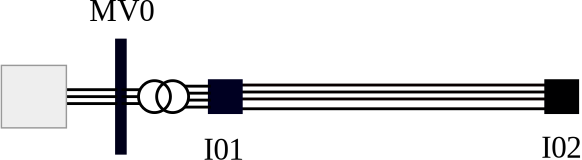

In [2]:
from IPython.core.display import HTML,SVG
SVG('https://tinyurl.com/cigreind')

## Model building

In [3]:
data = {
"system":{"S_base":1e6, "K_p_agc":0.01, "K_i_agc":0.01, "K_xif":0.01},
"buses":[
         {"name": "MV0",  "pos_x":   0, "pos_y":   0, "units": "m", "U_kV":20.0, "N_nodes":3, "phi_deg_0":30.0},
         {"name": "I01",  "pos_x":  90, "pos_y":   0, "units": "m", "U_kV":0.4},
         {"name": "I02",  "pos_x": 150, "pos_y":   0, "units": "m", "U_kV":0.4}
        ], 
"transformers":[
        {"bus_j": "MV0",  "bus_k": "I01",  "S_n_kVA": 100, "U_j_kV":20, "U_k_kV":0.4,
         "R_cc_pu": 0.01, "X_cc_pu":0.04, "connection": "Dyn11t",   "conductors_j": 3, "conductors_k": 4,
         "monitor":True}
       ],
"lines":[
        { "bus_j": "I01",  "bus_k": "I02",  "code":   "UG2", "m": 100.0, "monitor":True, "sym":False}
        ],
"loads":[
         { "bus": "I02" , "kVA": 100.0, "pf": 0.85, "type":"3P+N", "model":"ZIP"}
        ],
"shunts":[
        {"bus": "I01" , "R":  3.0, "X": 0.0, "bus_nodes": [3]}
         ],
"sources":[
       {"type":"ac3ph3w_ideal", "bus": "MV0", "S_n":100e3, "U_n" :20e3, "R":0.01, "X":0.1}
           ],
"line_codes":
        {
        "UG2":
            {"R":[ [0.314, 0.049, 0.049, 0.049], 
                    [0.049, 0.314, 0.049, 0.049], 
                    [0.049, 0.049, 0.314, 0.049], 
                    [0.049, 0.049, 0.049, 0.314]], 
            "X":[[0.762, 0.687, 0.665, 0.687],
                    [0.687, 0.762, 0.687, 0.665],
                    [0.665, 0.687, 0.762, 0.687],
                    [0.687, 0.665, 0.687, 0.762]], "I_max":200.0
                    },
        }
}

In [4]:
from pydae.urisi.urisi_builder import urisi


grid = urisi(data)
grid.uz_jacs = False
grid.build('cigre_eu_lv_ind')


AttributeError: 'list' object has no attribute 'is_extended_real'

## Model use

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML,SVG

In [3]:
import cigre_eu_lv_ind
from pydae.urisi.utils import report_v
from pydae.urisi.utils import get_v, get_i
from pydae.urisi.utils.model2svg import model2svg

### Initialization and power flow

In [35]:
model = cigre_eu_lv_ind.model()
model.ini({},'xy_0.json')
model.report_y()

V_MV0_0_r = 11546.81
V_MV0_0_i = -0.24
V_MV0_1_r = -5773.61
V_MV0_1_i = -9999.72
V_MV0_2_r = -5773.20
V_MV0_2_i = 9999.95
V_I01_0_r = 190.21
V_I01_0_i = -117.70
V_I01_1_r = -197.01
V_I01_1_i = -105.90
V_I01_2_r =  6.77
V_I01_2_i = 223.59
V_I01_3_r =  0.00
V_I01_3_i = -0.00
V_I02_0_r = 187.09
V_I02_0_i = -114.43
V_I02_1_r = -192.93
V_I02_1_i = -105.00
V_I02_2_r =  5.82
V_I02_2_i = 219.77
V_I02_3_r = -0.01
V_I02_3_i = -0.34
i_load_I02_a_r = -68.67
i_load_I02_a_i = 135.72
i_load_I02_b_r = 151.62
i_load_I02_b_i = -8.77
i_load_I02_c_r = -83.13
i_load_I02_c_i = -126.52
i_load_I02_n_r =  0.17
i_load_I02_n_i = -0.43
i_vsc_MV0_a_r =  2.54
i_vsc_MV0_b_r = -2.71
i_vsc_MV0_c_r =  0.17
i_vsc_MV0_a_i = -1.67
i_vsc_MV0_b_i = -1.36
i_vsc_MV0_c_i =  3.03
omega_coi =  1.00
p_agc =  0.00


#### Results

In [36]:
report_v(model, data);

V_MV0_an: 11546.8|   -0.0º V,    V_MV0_ag: 11546.8|   -0.0º V,    V_1 = 11546.8 V, unb = 0.00%
V_MV0_bn: 11546.8| -120.0º V,    V_MV0_bg: 11546.8| -120.0º V,    V_2 =     0.0 V
V_MV0_cn: 11546.8|  120.0º V,    V_MV0_cg: 11546.8|  120.0º V,    v_0 =     0.0 V
  V_MV0_ng:      0.0|      0.0º V
V_I01_an:   223.7|  -31.7º V,    V_I01_ag:   223.7|  -31.7º V,    V_1 =   223.7 V, unb = 0.01%
V_I01_bn:   223.7| -151.7º V,    V_I01_bg:   223.7| -151.7º V,    V_2 =     0.0 V
V_I01_cn:   223.7|   88.3º V,    V_I01_cg:   223.7|   88.3º V,    v_0 =     0.0 V
  V_I01_ng:      0.0|    -43.3º V
V_I02_an:   219.1|  -31.4º V,    V_I02_ag:   219.3|  -31.5º V,    V_1 =   219.6 V, unb = 0.48%
V_I02_bn:   219.5| -151.5º V,    V_I02_bg:   219.6| -151.4º V,    V_2 =     0.2 V
V_I02_cn:   220.2|   88.5º V,    V_I02_cg:   219.8|   88.5º V,    v_0 =     0.1 V
  V_I02_ng:      0.3|    -91.9º V


In [37]:
get_v(model,'I02','V_bn_m')

219.47502635519004

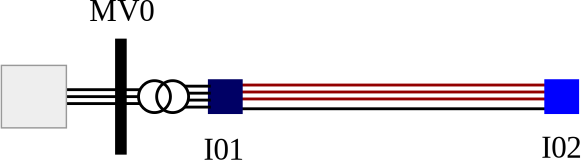

In [38]:
s = model2svg(model,data,'https://tinyurl.com/cigreind')
s.set_text('MV0_P',f"{model.get_value('p_MV0')/1000:5.2f} kW")
s.save('cigre_eu_lv_ind_results.svg')    
SVG('cigre_eu_lv_ind_results.svg')

### Load change

In [8]:
model.report_u()

p_load_I02_a =28333.33
q_load_I02_a =17559.42
g_load_I02_a = 0.00
b_load_I02_a = 0.00
p_load_I02_b =28333.33
q_load_I02_b =17559.42
g_load_I02_b = 0.00
b_load_I02_b = 0.00
p_load_I02_c =28333.33
q_load_I02_c =17559.42
g_load_I02_c = 0.00
b_load_I02_c = 0.00
e_ao_m_MV0 =11547.01
e_bo_m_MV0 =11547.01
e_co_m_MV0 =11547.01
phi_MV0 = 0.00
u_freq = 0.00


In [17]:
model.ini({'p_load_I02_a':50e3, 'q_load_I02_a': 10e3,
           'p_load_I02_b': 0e3, 'q_load_I02_b': 0e3,
           'p_load_I02_c': 0e3, 'q_load_I02_c': 0e3,
           },'xy_0.json')

True

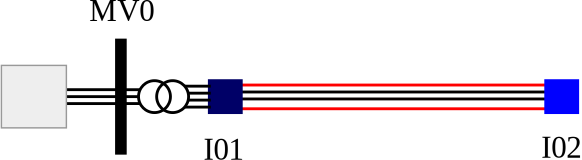

In [33]:
from pydae.svg_tools import svg
from pydae.urisi.utils import get_v, get_i
import numpy as np
import os
import json
import hjson

class model2svg(svg):

    def __init__(self, model, grid_data, svg_file):

        super().__init__(svg_file)
        self.model = model
        self.set_grid(grid_data)

        self.V_min_pu = 0.95
        self.V_max_pu = 1.05

        self.set_buses_title()
        self.set_lines_title()

        self.set_lines_currents_colors()
        self.set_buses_voltages_colors()
        self.set_transformers_title()
                
    def set_grid(self,grid_data):
        
        if type(grid_data) == dict:
            data = grid_data

        if type(grid_data) == str:
            if os.path.splitext(grid_data)[1] == '.json':
                with open(grid_data,'r') as fobj:
                    data = json.loads(fobj.read().replace("'",'"'))
            if os.path.splitext(grid_data)[1] == '.hjson':
                with open(grid_data,'r') as fobj:
                    data = hjson.loads(fobj.read().replace("'",'"'))

        self.grid_data = data


    def set_buses_title(self):

        load_buses = [bus_name['bus'] for bus_name in self.grid_data['loads']]

        for bus in self.grid_data['buses']:

            if not 'N_nodes' in bus: bus.update({'N_nodes':4})

            if bus['N_nodes'] == 4:
                bus_name = bus['name']
                U_base = bus['U_kV']*1000
                V_base = U_base/np.sqrt(3)
                string = 'Voltages and powers:\n'
                for phn in ['an','bn','cn','ng']:
                    V = get_v(self.model,bus_name,f'V_{phn}_m')
                    V_pu = V/V_base

                    p = 0.0
                    q = 0.0
                    if bus_name in load_buses:
                        ph = phn[0]
                        if  not ph == 'n':
                            p = self.model.get_value(f'p_load_{bus_name}_{ph}')
                            q = self.model.get_value(f'q_load_{bus_name}_{ph}')

                    if not phn == 'ng':  
                        if q < 0.0:    
                            string += f"V{phn} = {V:7.1f} V ({V_pu:4.2f} pu), S{phn} = {p/1e3:5.1f} - {np.abs(q)/1e3:5.1f}j kVA \n"
                        else:
                            string += f"V{phn} = {V:7.1f} V ({V_pu:4.2f} pu), S{phn} = {p/1e3:5.1f} + {np.abs(q)/1e3:5.1f}j kVA \n"

                    else:
                        string += f"V{phn} = {V:7.1f} V ({V_pu:4.2f} pu)\n"
    
            if bus['N_nodes'] == 3:
                bus_name = bus['name']
                U_base = bus['U_kV']*1000
                string = 'Voltages:\n'
                for phn in ['ab','bc','ca']:
                    U = get_v(self.model,bus_name,f'U_{phn}_m')
                    U_pu = U/U_base
                    string += f"U{phn} = {U:7.1f} V, {U_pu:4.2f} pu\n"

            self.set_title(bus_name,string)        

    def set_lines_title(self):

        for line in self.grid_data['lines']:
            bus_j = line['bus_j']
            bus_k = line['bus_k']

            string = 'Currents:\n'
            for it,ph in enumerate(['a','b','c','n']):

                line_name = f'l_{bus_j}_{it}_{bus_k}_{it}'
                I = get_i(self.model,bus_j,bus_k,type=f'I_{ph}_m')
                string += f"I{ph} = {I:6.1f} A\n"

            for it,ph in enumerate(['a','b','c','n']):  
                line_name = f'l_{bus_j}_{it}_{bus_k}_{it}'
                self.set_title(line_name,string) 

    def set_lines_currents_colors(self):
        
        for line in self.grid_data['lines']:
            #if not 'monitor'in line or not 'vsc_line' in line: continue
            if 'monitor' in line:
                if not line['monitor']: continue
            if 'vsc_line' in line:
                if not line['vsc_line']: continue
                    
            bus_j = line['bus_j']
            bus_k = line['bus_k']

            z2a = {'0':'a','1':'b','2':'c','3':'n'}
            for ph in ['0','1','2','3']:
                line_id = f'l_{bus_j}_{ph}_{bus_k}_{ph}'
                if  f'i_{line_id}_r' in self.model.outputs_list:
                    if 'code' in line:
                        I_max = self.grid_data["line_codes"][line['code']]['I_max']
                    else:
                        I_max = line['I_max']

                    i_r = self.model.get_value(f'i_{line_id}_r') 
                    i_i = self.model.get_value(f'i_{line_id}_i') 
                    i = i_r + 1j*i_i
                    i_abs = np.abs(i)

                    if i_abs < 1e-3: continue
                    i_sat = np.clip((i_abs/I_max)**2*255,0,255)
                    self.set_color('line',line_id,(int(i_sat),0,0))

    def set_buses_voltages_colors(self):
        
        for bus in self.grid_data['buses']:

            if not 'N_nodes' in bus: bus['N_nodes'] == 4

            if bus['N_nodes'] == 4:

                bus_name = bus['name']
                U_base = bus['U_kV']*1000
                V_base = U_base/np.sqrt(3)
                string = 'Voltages:\n'
                V_pu_max_deviation = 0.0
                for phn in ['an','bn','cn']:
                    V = get_v(self.model,bus_name,f'V_{phn}_m')
                    V_pu = V/V_base
                    DV = V_pu - 1.0
                    if np.abs(DV) > np.abs(V_pu_max_deviation):
                        V_pu_max_deviation = DV
                V_pu = V_pu_max_deviation + 1.0
               
                # when V_pu = V_med_pu color = 0, when V_pu = V_max_pu color = 255 (red)
                # when V_pu = V_med_pu color = 0, when V_pu = V_min_pu color = 255 (blue)
                if V_pu < 1:
                    blue = np.clip(255*((V_pu - 1)/(self.V_min_pu - 1))**2,0,255)
                    self.set_color('rect',f'{bus["name"]}',(0,0,int(blue)))  
                if V_pu > 1:
                    red  = np.clip(255*((V_pu - 1)/(self.V_max_pu - 1))**2,0,255)
                    self.set_color('rect',f'{bus["name"]}',(int(red),0,0)) 
                
            if bus['N_nodes'] == 3:

                bus_name = bus['name']
                U_base = bus['U_kV']*1000
                string = 'Voltages:\n'
                for phn in ['ab','bc','ca']:
                    U = get_v(self.model,bus_name,f'U_{phn}_m')
                    U_pu = U/U_base
            
                # when V_pu = V_med_pu color = 0, when V_pu = V_max_pu color = 255 (red)
                # when V_pu = V_med_pu color = 0, when V_pu = V_min_pu color = 255 (blue)
                if U_pu < 1:
                    blue = np.clip(255*((U_pu - 1)/(self.V_min_pu - 1))**2,0,255)
                    self.set_color('rect',f'{bus["name"]}',(0,0,int(blue)))  
                if U_pu > 1:
                    red  = np.clip(255*((U_pu - 1)/(self.V_max_pu - 1))**2,0,255)
                    self.set_color('rect',f'{bus["name"]}',(int(red),0,0)) 
                

                # if acdc == 'ac':
                #     if V_pu < v_ac_min:
                #         self.post_data.update({'v_ac_min':{'bus':bus['name'],'value':V_pu}})
                #         v_ac_min = V_pu
                #     if V_pu > v_ac_max:
                #         self.post_data.update({'v_ac_max':{'bus':bus['name'],'value':V_pu}})
                #         v_ac_

    def set_transformers_title(self):

        for trafo in self.grid_data['transformers']:
            bus_j = trafo['bus_j']
            bus_k = trafo['bus_k']

            string = 'Currents:\n'

            I_1_a = self.model.get_value(f'i_t_{bus_j}_{bus_k}_1_0_r') + 1j*self.model.get_value(f'i_t_{bus_j}_{bus_k}_1_0_i')
            I_1_b = self.model.get_value(f'i_t_{bus_j}_{bus_k}_1_1_r') + 1j*self.model.get_value(f'i_t_{bus_j}_{bus_k}_1_1_i')
            I_1_c = self.model.get_value(f'i_t_{bus_j}_{bus_k}_1_2_r') + 1j*self.model.get_value(f'i_t_{bus_j}_{bus_k}_1_2_i')

            I_2_a = self.model.get_value(f'i_t_{bus_j}_{bus_k}_2_0_r') + 1j*self.model.get_value(f'i_t_{bus_j}_{bus_k}_2_0_i')
            I_2_b = self.model.get_value(f'i_t_{bus_j}_{bus_k}_2_1_r') + 1j*self.model.get_value(f'i_t_{bus_j}_{bus_k}_2_1_i')
            I_2_c = self.model.get_value(f'i_t_{bus_j}_{bus_k}_2_2_r') + 1j*self.model.get_value(f'i_t_{bus_j}_{bus_k}_2_2_i')
            I_2_n = self.model.get_value(f'i_t_{bus_j}_{bus_k}_2_3_r') + 1j*self.model.get_value(f'i_t_{bus_j}_{bus_k}_2_3_i')

            string += f"Ia = {np.abs(I_1_a):6.1f} A\tIa = {np.abs(I_2_a):6.1f} A \n"
            string += f"Ib = {np.abs(I_1_b):6.1f} A\tIb = {np.abs(I_2_b):6.1f} A \n"
            string += f"Ic = {np.abs(I_1_c):6.1f} A\tIc = {np.abs(I_2_c):6.1f} A \n"
            string += f"\t\t\t  In = {np.abs(I_2_n):6.1f} A \n"

            self.set_title(f'trafo_{bus_j}_{bus_k}_g',string) 

s = model2svg(model,data,'https://tinyurl.com/cigreind')
s.set_text('MV0_P',f"{model.get_value('p_MV0')/1000:5.2f} kW")
s.save('cigre_eu_lv_ind_results_unb.svg')    
SVG('cigre_eu_lv_ind_results_unb.svg')

In [22]:
model.report_z()

i_l_I01_0_I02_0_r = 171.01
i_l_I01_0_I02_0_i = -171.97
i_l_I01_1_I02_1_r =  0.00
i_l_I01_1_I02_1_i = -0.00
i_l_I01_2_I02_2_r = -0.00
i_l_I01_2_I02_2_i = -0.00
i_l_I01_3_I02_3_r = -171.01
i_l_I01_3_I02_3_i = 171.97
i_t_MV0_I01_1_0_r =  1.97
i_t_MV0_I01_1_0_i = -1.99
i_t_MV0_I01_1_1_r = -0.00
i_t_MV0_I01_1_1_i = -0.00
i_t_MV0_I01_1_2_r = -1.97
i_t_MV0_I01_1_2_i =  1.99
i_t_MV0_I01_2_0_r = -171.01
i_t_MV0_I01_2_0_i = 171.97
i_t_MV0_I01_2_1_r = -0.00
i_t_MV0_I01_2_1_i =  0.00
i_t_MV0_I01_2_2_r = -0.00
i_t_MV0_I01_2_2_i = -0.00
i_t_MV0_I01_2_3_r = 171.01
i_t_MV0_I01_2_3_i = -171.97
v_anm_I02 = 216.91
v_bnm_I02 = 231.45
v_cnm_I02 = 231.32
i_vsc_MV0_a_m =  2.80
i_vsc_MV0_b_m =  0.00
i_vsc_MV0_c_m =  2.80
p_MV0 = 54058.35
q_MV0 = 14646.52
xi_freq =  0.00
u_freq =  0.00
